Exercises
=============

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 1. Write your codes according to the following questions.

(a) Create a Series with the given information of index and values,

    index: ['Seoul', 'Daejeon', 'Daegu', 'Busan', 'Gwangju', 'Incheon', 'Ulsan', 'Jeju']
    values: [9911088, 1480777, 2446144, 3438710, 1471385, 3010476, 1153901, 697578]

In [2]:
# your code here

q1 = pd.Series(index=['Seoul', 'Daejeon', 'Daegu', 'Busan', 'Gwangju', 'Incheon', 'Ulsan', 'Jeju'], data=[9911088, 1480777, 2446144, 3438710, 1471385, 3010476, 1153901, 697578])

In [3]:
help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool' = False, fastpath: 'bool' = False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Ser

(b) From the Series defined above (problem 1(a)), obtain the mean of the values of the Series.

In [4]:
# your code here

print(q1.mean())

2951257.375


(c) From the Series defined above (problem 1(a)), how many cities have higher values than the average value? Use the subseting method of Series.

In [5]:
# your code here
len(q1[q1.values> q1.mean()])


3

### 2. From the given sample dataframe, write your codes according to the following questions.

In [6]:
df1 = pd.DataFrame({'id': ['101', '102', '103', '104', '105', '106', '107'], 'price': range(7)})
df2 = pd.DataFrame({'id': ['101', '104', '108'], 'sales': range(3)})

(a) Merge those two dataframes (df1, df2) by "outer join" and store it to df3. 

In [7]:
# your code here

df3 = pd.merge(df1, df2, on = 'id', how='outer')

(b) Using a Pandas method, print rows with no missing values in the dataframe(df3).

In [8]:
# your code here

df3.dropna()

,id,price,sales
0,101,0.0,0.0
3,104,3.0,1.0


(c) Using a Pandas method, fill in the missing values as -10.0 for the column "price" and -1.0 for the column "sales".

In [9]:
# your code here
df3['price'] = df3['price'].fillna(-10.0)
df3['sales'] = df3['sales'].fillna(-1.0)


### 3. From the given sample dataframe, write your codes according to the following questions.

In [10]:
df3 = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'pastrami', 'corned beef', 'bacon', 'pastrami', 
                              'honey ham', 'nova lox'], 'ounces': [4, 3, 12, 6, 7.5, 4.0, 3, 5, 6]})

(a) Change the name of the column "ounces" to "weights". 

In [11]:
df3.head()

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5


In [12]:
# your code here

df3 = df3.rename({'ounces':'weights'})

In [13]:
df3.head()

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,pastrami,6.0
4,corned beef,7.5


(b) Using a Pandas method, get the only non-duplicated rows in dataframe(df4).

In [14]:
# your code here
df4 = df3.drop_duplicates()

(c) Replace the value "bacon" as "BACON" in the dataframe(df4).

In [15]:
# your code here

df4['food'] = df4['food'].replace('bacon', 'BACON')

/Users/boysbeanxious/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### 4. From the given data "mlb_winloss.csv", write your codes according to the following questions.

In [16]:
df_mlb = pd.read_csv('./mlb_winloss.csv')

######## For Colab users ########
#import io
#from google.colab import files
#uploaded = files.upload()
#df_mlb = pd.read_csv(io.StringIO(uploaded['mlb_winloss.csv'].decode('utf-8')))

(a) Check the datatype of columns of the dataframe df_mlb. How many columns have int64 type?

In [17]:
# your code here

sum(np.where(df_mlb.dtypes.reset_index()[0]=='int64',1,0))

3

(b) Change the type of columns **Won** and **Lost** from object to numeric.

In [18]:
# your code here
df_mlb['Won']=df_mlb['Won'].str.replace(',', '').astype(int)
df_mlb['Lost'] = df_mlb['Lost'].str.replace(',', '').astype(int)

In [19]:
df_mlb.head()

,Rank,Team,Won,Lost,Tied,First MLB Season,Division
0,1,New York Yankees,10621,8090,93,1901,AL East
1,2,San Francisco Giants,11301,9773,163,1883,NL West
2,3,Los Angeles Dodgers,11123,9891,139,1884,NL West
3,4,St. Louis Cardinals,11038,10163,152,1882,NL Central
4,5,Boston Red Sox,9718,9014,83,1901,AL East


(c) How many teams have more wins(Won) than defeats(Lost)?

In [20]:
# your code here
len(df_mlb[df_mlb['Won']>df_mlb['Lost']])

12

(d) Among the AL Central division teams, which is the newest team? (you can use the **First MLB Season** column).

In [21]:
# your code here

df_mlb[df_mlb['Division']=='AL East'].sort_values(by = 'First MLB Season', ascending=False).head(1)['Team'].values[0]

'Tampa Bay Rays'

(e) Insert a new column **winlossratio** and assign the value as the ratio of win/loss using the **Won** and **Lost** columns.

In [22]:
# your code here

df_mlb['winlossratio'] = df_mlb['Won']/df_mlb['Lost']

### 5. From the given two data "covid_tweet1.tsv" and "covid_tweet1.tsv",  write your codes according to the following questions.

In [23]:
tweet_df1 = pd.read_csv('./covid_tweet1.tsv', sep='\t')
tweet_df2 = pd.read_csv('./covid_tweet2.tsv', sep='\t')

######## For Colab users ########
#import io
#from google.colab import files
#uploaded = files.upload()
#tweet_df1 = pd.read_csv(io.StringIO(uploaded['covid_tweet1.tsv'].decode('utf-8')), sep='\t')

#uploaded = files.upload()
#tweet_df2 = pd.read_csv(io.StringIO(uploaded['covid_tweet2.tsv'].decode('utf-8')), sep='\t')

(a) From the given two dataframes (**tweet_df1**, **tweet_df2**), merge those two dataframe into one using the common column **ID** of them.

In [24]:
tweet_df1.head()

,ID,User,To,Text,Date
0,1233904417591693314,HelenBranswell,NaN,"2 days does not a trend make, but it feels lik...",2020-02-29 23:58:32+00:00
1,1233903789167562754,IRLReason,stevedaddy0,"She had COVID19. He said ""Come on Eileen""",2020-02-29 23:56:02+00:00
2,1233903652475039744,LaRivaPeltier,NaN,We stand with the Chinese and Chinese-American...,2020-02-29 23:55:30+00:00
3,1233902948402565120,mattbc,NaN,Would you support legislation requiring payers...,2020-02-29 23:52:42+00:00
4,1233902138528600064,Laurie_Garrett,sciencecohen,Cautionary tale: #SARS emerged in 2003 #MERS e...,2020-02-29 23:49:29+00:00


In [25]:
print(tweet_df1.shape)
print(tweet_df2.shape)

(100, 5)
(100, 5)


In [26]:
# your code here
tweet_mg = pd.merge(tweet_df1, tweet_df2, on='ID')

(b) Sort the dataframe obtained above (Problem 4(a)) by the column **Favorites** with descending order. Which user make a tweet with the highest **Favorites**?

In [27]:
# your code here
tweet_mg[['User','Favorites']].sort_values(by = ['Favorites'], ascending=False).head(1)['User'].values[0]


'MrTommyCampbell'

(c) Obtain the correlation coefficient between **Favorites** and **Retweets** values. 

In [28]:
# your code here
tweet_mg[['Favorites','Retweets']].corr()

,Favorites,Retweets
Favorites,1.000000,0.880623
Retweets,0.880623,1.000000


### 6. From the given data "boston_housong.csv", write your codes according to the following questions.

In [29]:
df_housing = pd.read_csv('./boston_housing.csv')

######## For Colab users ########
#import io
#from google.colab import files
#uploaded = files.upload()
#df_housing = pd.read_csv(io.StringIO(uploaded['boston_housing.csv'].decode('utf-8')))

(a) Create a scatter plot according to the following conditions
   * x values: 'TAX' 
   * y values: 'PRICE'

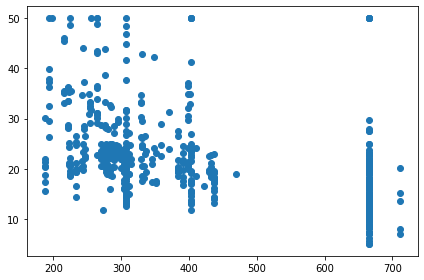

In [30]:
# your code here

x = df_housing['TAX']
y = df_housing['PRICE']
 
plt.scatter(x, y)
plt.tight_layout()
plt.show()


(b) Create a bubble plot according to the following conditions
   * x values: "DIS"
   * y values: "PRICE"
   * size of bubbles: "INDUS"

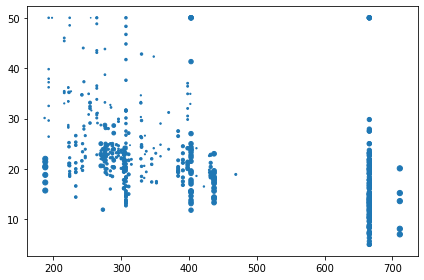

In [31]:
# your code here

x = df_housing['TAX']
y = df_housing['PRICE']

plt.scatter(x, y, s = df_housing['INDUS'])
plt.tight_layout()
plt.show()

(c) Plot the distribution of "AGE" values.

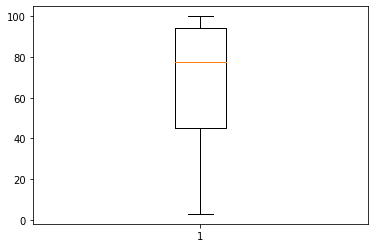

In [32]:
# your code here

plt.boxplot(df_housing['AGE'])
plt.show()

(d) Plot the heatmap of all numerical variables. Which variable (column) is the most correlated with the value "PRICE"? (Show your answer of the result as the heatmap here, and type the name of variable(column) in the below cell).

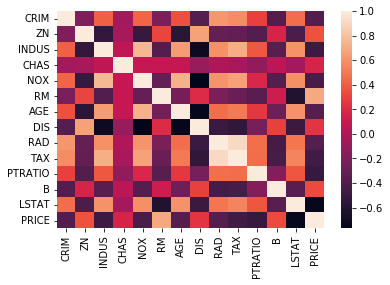

In [33]:
# your code here
sns.heatmap(df_housing.corr())
plt.show()


In [34]:
# name of the variable : 
df_housing.corr()['PRICE'].reset_index().sort_values(by = 'PRICE', ascending=False).iloc[1,0]

'RM'

### 7. Benford's law, also called the Newcomb–Benford law, the law of anomalous numbers, or the first-digit law, is an observation about the frequency distribution of leading digits in many real-life sets of numerical data (https://en.wikipedia.org/wiki/Benford%27s_law).
* It was found that the first digits are not uniformly distributed, but follow the logarithmic distribution,
$p(d) = log_{10}(\frac{d+1}{d})$
    
* Now, let's take a look at real cash flow data.

In [35]:
df_cf = pd.read_csv('./cash_flow.csv')

######## For Colab users ########
#import io
#from google.colab import files
#uploaded = files.upload()
#df_cf = pd.read_csv(io.StringIO(uploaded['cash_flow.csv'].decode('utf-8')))

(a) Check the datatype of each columns and change the datatype of columns ("제 50 기", "제 51 기", "제 52 기") to numeric.

In [36]:
# your code here
df_cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   34 non-null     object
 1   제 52 기  34 non-null     object
 2   제 51 기  34 non-null     object
 3   제 50 기  34 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [37]:
df_cf[['제 52 기', '제 51 기', '제 50 기']] = df_cf[['제 52 기', '제 51 기', '제 50 기']].apply(lambda x : x.str.replace(',','')).astype(int)

(b) Collect all numbers into one list and extract only the leading digits.

In [38]:
# your code here
a1 = np.array(df_cf['제 52 기'])
a2 = np.array(df_cf['제 51 기'])
a3 = np.array(df_cf['제 50 기'])

arrmerge = np.append(a1, a2)
arrmerge = np.append(arrmerge, a3)

In [39]:
df_cf_1 = pd.DataFrame(arrmerge, columns=['num'])

In [40]:
df_cf_1['num_str'] = df_cf_1['num'].abs().astype(str)

In [41]:
df_cf_1['leading_digit'] = df_cf_1['num_str'].str.slice(0,1)

In [42]:
df_cf_1['leading_digit']

0      3
1      3
2      1
3      2
4      3
      ..
97     1
98     0
99     1
100    2
101    2
Name: leading_digit, Length: 102, dtype: object

(c) Count and get the probability of leading digits.

In [43]:
# your code here
print(df_cf_1['leading_digit'].value_counts())
print(df_cf_1['leading_digit'].value_counts(normalize=True))


1    23
2    22
3    11
0    11
7     9
5     7
4     6
6     6
9     5
8     2
Name: leading_digit, dtype: int64
1    0.225490
2    0.215686
3    0.107843
0    0.107843
7    0.088235
5    0.068627
4    0.058824
6    0.058824
9    0.049020
8    0.019608
Name: leading_digit, dtype: float64


(d) Plot the results and compare Benford's values and real probabilities.

In [44]:
# your code here : Benford's values
df_cf_1['leading_digit_int'] = df_cf_1['leading_digit'].astype('int')

In [45]:
import math
leading_digit_int_df = pd.DataFrame(df_cf_1['leading_digit_int'].drop_duplicates())
leading_digit_int_df['Benford_value'] = leading_digit_int_df['leading_digit_int'].apply(lambda x: 0 if x==0 else math.log10((x+1)/x))
leading_digit_int_df = leading_digit_int_df.sort_values(by = 'leading_digit_int').reset_index(drop=True)

In [46]:
# your code here : real probabilities.
df_cf_2 = pd.DataFrame(df_cf_1['leading_digit'].value_counts(normalize=True)).reset_index()


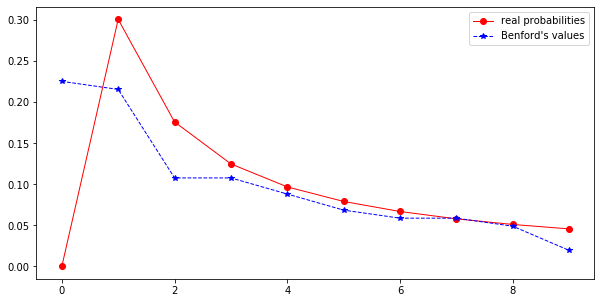

In [47]:
plt.figure(figsize=(10, 5))

plt.plot(leading_digit_int_df.leading_digit_int, leading_digit_int_df.Benford_value, color='red', linestyle='solid', linewidth=1, marker='o')
plt.plot(df_cf_2.index, df_cf_2.leading_digit, color='blue', linestyle='dashed', linewidth=1, marker='*')

plt.legend(labels=['real probabilities', "Benford's values"], loc='upper right')

plt.show()

### 8. Open question: Select any data you are interested in and proceed with exploratory data analysis.

* To obtain data, the following websites would be useful:
    * https://www.kaggle.com/
    * https://www.quandl.com/
    * https://www.data.gov/
    * https://www.data.go.kr/
    * https://aihub.or.kr/

In [50]:
# your code here

netflix = pd.read_csv('./netflix_titles.csv')


In [52]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [53]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [54]:
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
